In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

### Data Import

In [28]:
df = pd.read_excel("Customer Churn Data.xlsx", sheet_name="Data for DSBA")

### Convert all columns to capital case for ease

In [29]:
df.columns = [x.upper() for x in df.columns]

### Head and Tail

In [30]:
df.head()

,ACCOUNTID,CHURN,TENURE,CITY_TIER,CC_CONTACTED_LY,PAYMENT,GENDER,SERVICE_SCORE,ACCOUNT_USER_COUNT,ACCOUNT_SEGMENT,CC_AGENT_SCORE,MARITAL_STATUS,REV_PER_MONTH,COMPLAIN_LY,REV_GROWTH_YOY,COUPON_USED_FOR_PAYMENT,DAY_SINCE_CC_CONNECT,CASHBACK,LOGIN_DEVICE
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [31]:
df.tail()

,ACCOUNTID,CHURN,TENURE,CITY_TIER,CC_CONTACTED_LY,PAYMENT,GENDER,SERVICE_SCORE,ACCOUNT_USER_COUNT,ACCOUNT_SEGMENT,CC_AGENT_SCORE,MARITAL_STATUS,REV_PER_MONTH,COMPLAIN_LY,REV_GROWTH_YOY,COUPON_USED_FOR_PAYMENT,DAY_SINCE_CC_CONNECT,CASHBACK,LOGIN_DEVICE
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


### Dataset information

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ACCOUNTID                11260 non-null  int64  
 1   CHURN                    11260 non-null  int64  
 2   TENURE                   11158 non-null  object 
 3   CITY_TIER                11148 non-null  float64
 4   CC_CONTACTED_LY          11158 non-null  float64
 5   PAYMENT                  11151 non-null  object 
 6   GENDER                   11152 non-null  object 
 7   SERVICE_SCORE            11162 non-null  float64
 8   ACCOUNT_USER_COUNT       11148 non-null  object 
 9   ACCOUNT_SEGMENT          11163 non-null  object 
 10  CC_AGENT_SCORE           11144 non-null  float64
 11  MARITAL_STATUS           11048 non-null  object 
 12  REV_PER_MONTH            11158 non-null  object 
 13  COMPLAIN_LY              10903 non-null  float64
 14  REV_GROWTH_YOY        

### Data set balanced?

In [33]:
df['CHURN'].value_counts(normalize=True).mul(100)

0    83.161634
1    16.838366
Name: CHURN, dtype: float64

### Duplicate and NA checks

In [34]:
df.duplicated().sum()

0

In [35]:
df.isna().sum()

ACCOUNTID                    0
CHURN                        0
TENURE                     102
CITY_TIER                  112
CC_CONTACTED_LY            102
PAYMENT                    109
GENDER                     108
SERVICE_SCORE               98
ACCOUNT_USER_COUNT         112
ACCOUNT_SEGMENT             97
CC_AGENT_SCORE             116
MARITAL_STATUS             212
REV_PER_MONTH              102
COMPLAIN_LY                357
REV_GROWTH_YOY               0
COUPON_USED_FOR_PAYMENT      0
DAY_SINCE_CC_CONNECT       357
CASHBACK                   471
LOGIN_DEVICE               221
dtype: int64

### Dataset shape

In [36]:
df.shape

(11260, 19)

### Summary of the dataset

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ACCOUNTID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
CHURN,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
CITY_TIER,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_CONTACTED_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
SERVICE_SCORE,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_AGENT_SCORE,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
COMPLAIN_LY,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


### Data type converstions and Data transformations

In [38]:
df['TENURE'].replace('#', '1', inplace=True)
df['GENDER'].replace('F', 'Female', inplace=True)
df['GENDER'].replace('M', 'Male', inplace=True)
df['ACCOUNT_USER_COUNT'].replace('@', '4', inplace=True)
df['REV_PER_MONTH'].replace('+', '3', inplace=True)
df['REV_GROWTH_YOY'].replace('$', '14', inplace=True)
df['COUPON_USED_FOR_PAYMENT'].replace('*', '1', inplace=True)
df['COUPON_USED_FOR_PAYMENT'].replace('#', '1', inplace=True)
df['COUPON_USED_FOR_PAYMENT'].replace('$', '1', inplace=True)
df['DAY_SINCE_CC_CONNECT'].replace('$', '3', inplace=True)
df['LOGIN_DEVICE'].replace('&&&&', 'Mobile', inplace=True)
df['CASHBACK'].fillna(0, inplace=True)
df['CASHBACK'] = df['CASHBACK'].replace('$', 0)

In [39]:
df['TENURE'] = pd.to_numeric(df['TENURE'])
df['ACCOUNT_USER_COUNT'] = pd.to_numeric(df['ACCOUNT_USER_COUNT'])
df['REV_PER_MONTH'] = pd.to_numeric(df['REV_PER_MONTH'])
df['REV_GROWTH_YOY'] = pd.to_numeric(df['REV_GROWTH_YOY'])
df['COUPON_USED_FOR_PAYMENT'] = pd.to_numeric(df['COUPON_USED_FOR_PAYMENT'])
df['DAY_SINCE_CC_CONNECT'] = pd.to_numeric(df['DAY_SINCE_CC_CONNECT'])

### Categorical data summary

In [40]:
for column in df.columns:
    if (df[column].dtype == 'object'):        
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: PAYMENT, dtype: int64


GENDER :  2
Female    4448
Male      6704
Name: GENDER, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Plus    3862
Super           4062
Name: ACCOUNT_SEGMENT, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     5860
Name: MARITAL_STATUS, dtype: int64


LOGIN_DEVICE :  2
Computer    3018
Mobile      8021
Name: LOGIN_DEVICE, dtype: int64




### Exploratory Data Analysis

#### Numeric feature Uni variate analysis

Text(0.5, 1.0, 'SERVICE_SCORE Distribution')

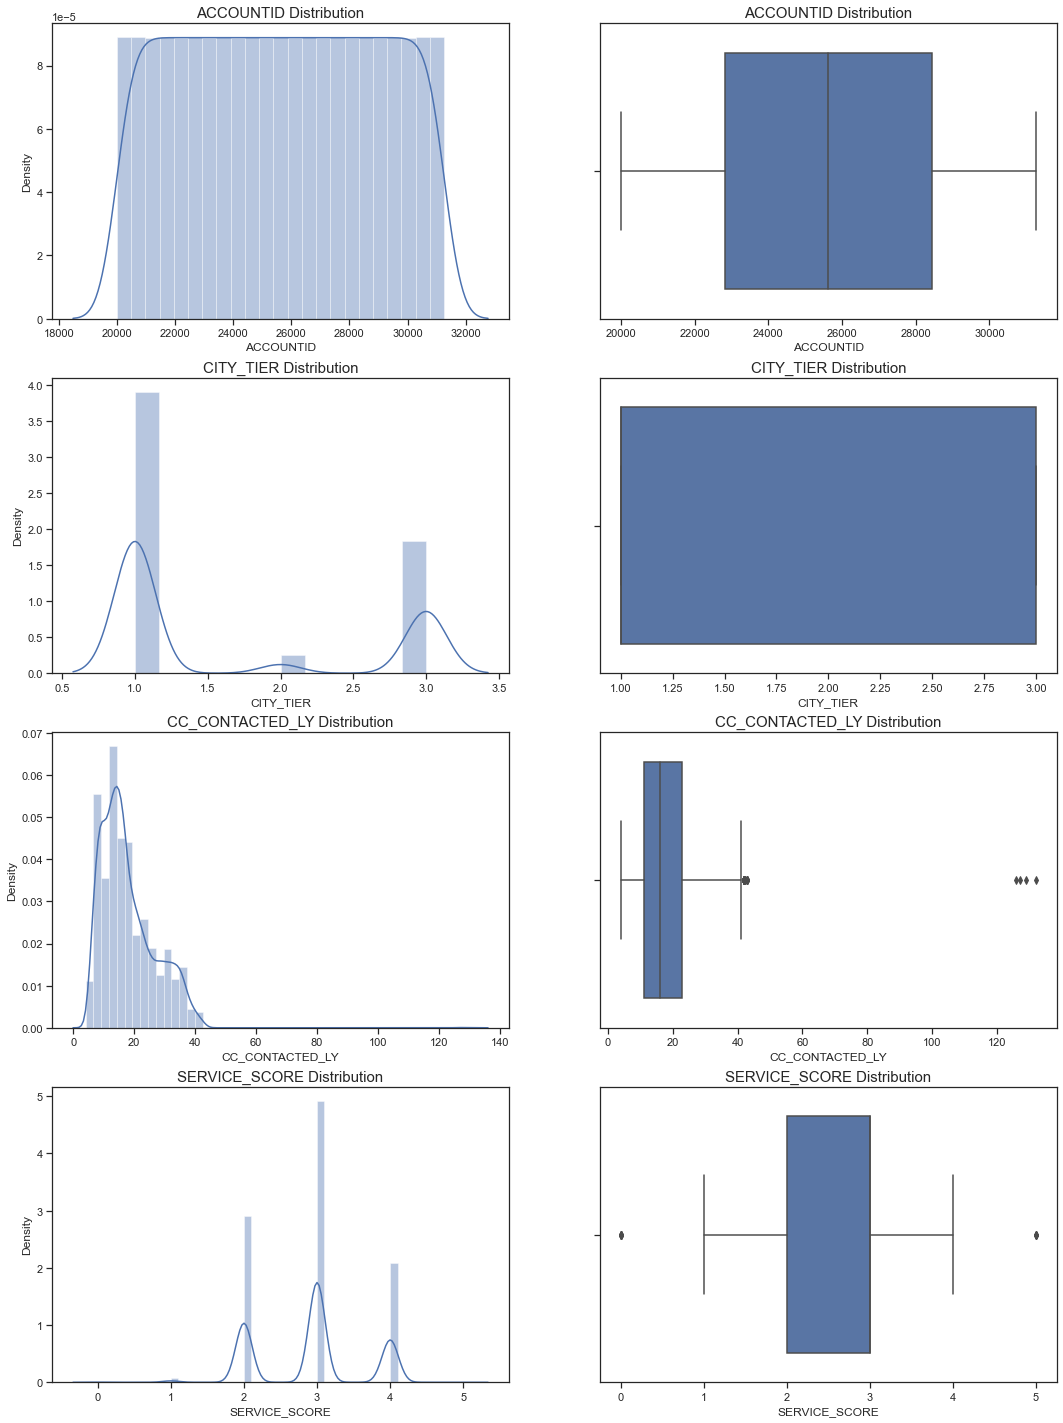

In [41]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(18, 25)

a = sns.distplot(df['ACCOUNTID'] , ax=axes[0][0])
a.set_title("ACCOUNTID Distribution",fontsize=15)
a = sns.boxplot(df['ACCOUNTID'] , orient = "v" , ax=axes[0][1])
a.set_title("ACCOUNTID Distribution",fontsize=15)

a = sns.distplot(df['CITY_TIER'] , ax=axes[1][0])
a.set_title("CITY_TIER Distribution",fontsize=15)
a = sns.boxplot(df['CITY_TIER'] , orient = "v" , ax=axes[1][1])
a.set_title("CITY_TIER Distribution",fontsize=15)

a = sns.distplot(df['CC_CONTACTED_LY'] , ax=axes[2][0])
a.set_title("CC_CONTACTED_LY Distribution",fontsize=15)
a = sns.boxplot(df['CC_CONTACTED_LY'] , orient = "v" , ax=axes[2][1])
a.set_title("CC_CONTACTED_LY Distribution",fontsize=15)

a = sns.distplot(df['SERVICE_SCORE'] , ax=axes[3][0])
a.set_title("SERVICE_SCORE Distribution",fontsize=15)
a = sns.boxplot(df['SERVICE_SCORE'] , orient = "h" , ax=axes[3][1])
a.set_title("SERVICE_SCORE Distribution",fontsize=15)

Text(0.5, 1.0, 'REV_GROWTH_YOY Distribution')

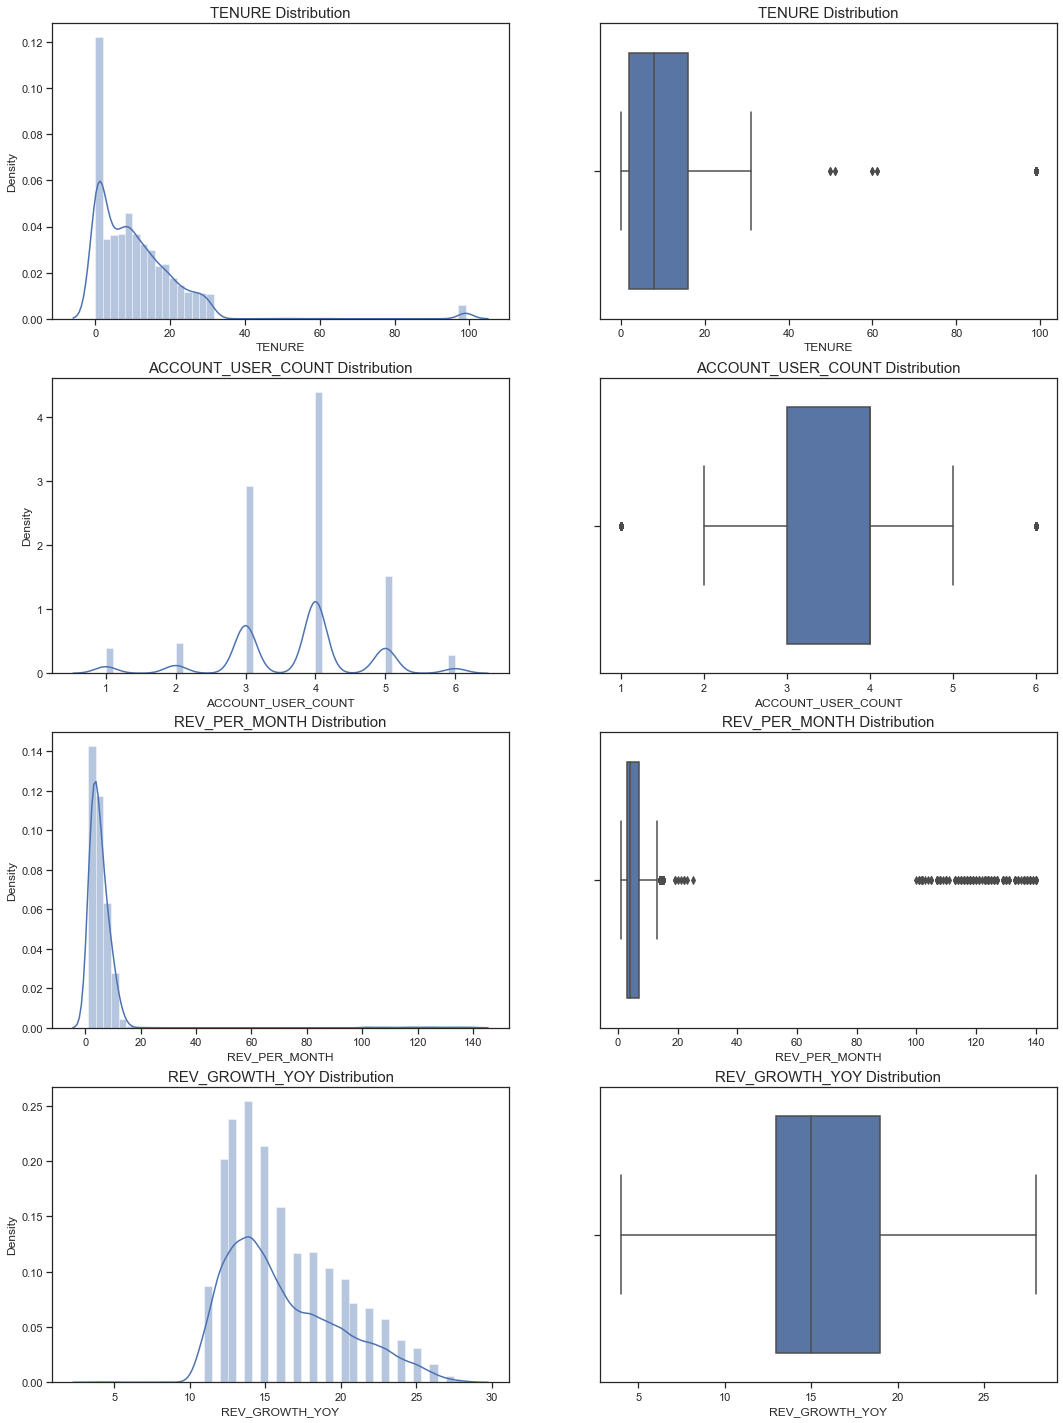

In [42]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(18, 25)

a = sns.distplot(df['TENURE'] , ax=axes[0][0])
a.set_title("TENURE Distribution",fontsize=15)
a = sns.boxplot(df['TENURE'] , orient = "v" , ax=axes[0][1])
a.set_title("TENURE Distribution",fontsize=15)

a = sns.distplot(df['ACCOUNT_USER_COUNT'] , ax=axes[1][0])
a.set_title("ACCOUNT_USER_COUNT Distribution",fontsize=15)
a = sns.boxplot(df['ACCOUNT_USER_COUNT'] , orient = "v" , ax=axes[1][1])
a.set_title("ACCOUNT_USER_COUNT Distribution",fontsize=15)

a = sns.distplot(df['REV_PER_MONTH'] , ax=axes[2][0])
a.set_title("REV_PER_MONTH Distribution",fontsize=15)
a = sns.boxplot(df['REV_PER_MONTH'] , orient = "v" , ax=axes[2][1])
a.set_title("REV_PER_MONTH Distribution",fontsize=15)

a = sns.distplot(df['REV_GROWTH_YOY'] , ax=axes[3][0])
a.set_title("REV_GROWTH_YOY Distribution",fontsize=15)
a = sns.boxplot(df['REV_GROWTH_YOY'] , orient = "h" , ax=axes[3][1])
a.set_title("REV_GROWTH_YOY Distribution",fontsize=15)

Text(0.5, 1.0, 'DAY_SINCE_CC_CONNECT Distribution')

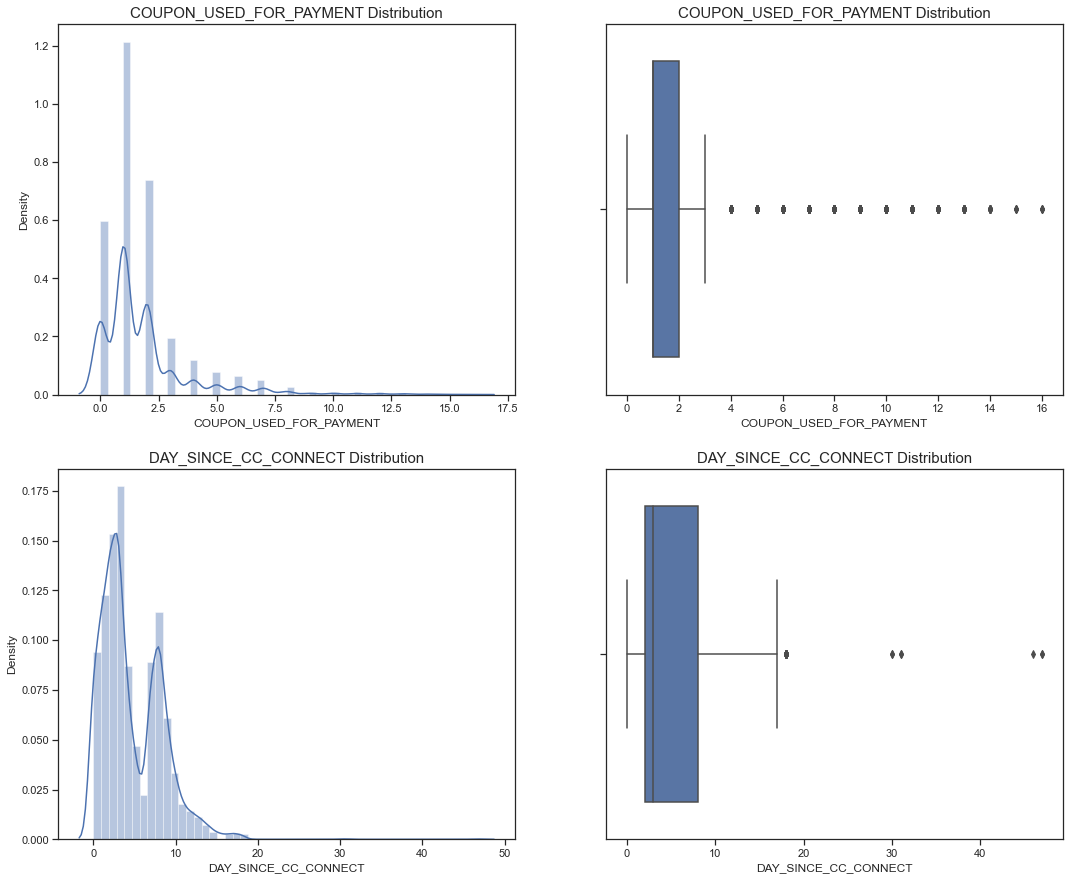

In [43]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(18, 15)

a = sns.distplot(df['COUPON_USED_FOR_PAYMENT'] , ax=axes[0][0])
a.set_title("COUPON_USED_FOR_PAYMENT Distribution",fontsize=15)
a = sns.boxplot(df['COUPON_USED_FOR_PAYMENT'] , orient = "v" , ax=axes[0][1])
a.set_title("COUPON_USED_FOR_PAYMENT Distribution",fontsize=15)

a = sns.distplot(df['DAY_SINCE_CC_CONNECT'] , ax=axes[1][0])
a.set_title("DAY_SINCE_CC_CONNECT Distribution",fontsize=15)
a = sns.boxplot(df['DAY_SINCE_CC_CONNECT'] , orient = "v" , ax=axes[1][1])
a.set_title("DAY_SINCE_CC_CONNECT Distribution",fontsize=15)

Text(0.5, 1.0, 'CASHBACK Distribution')

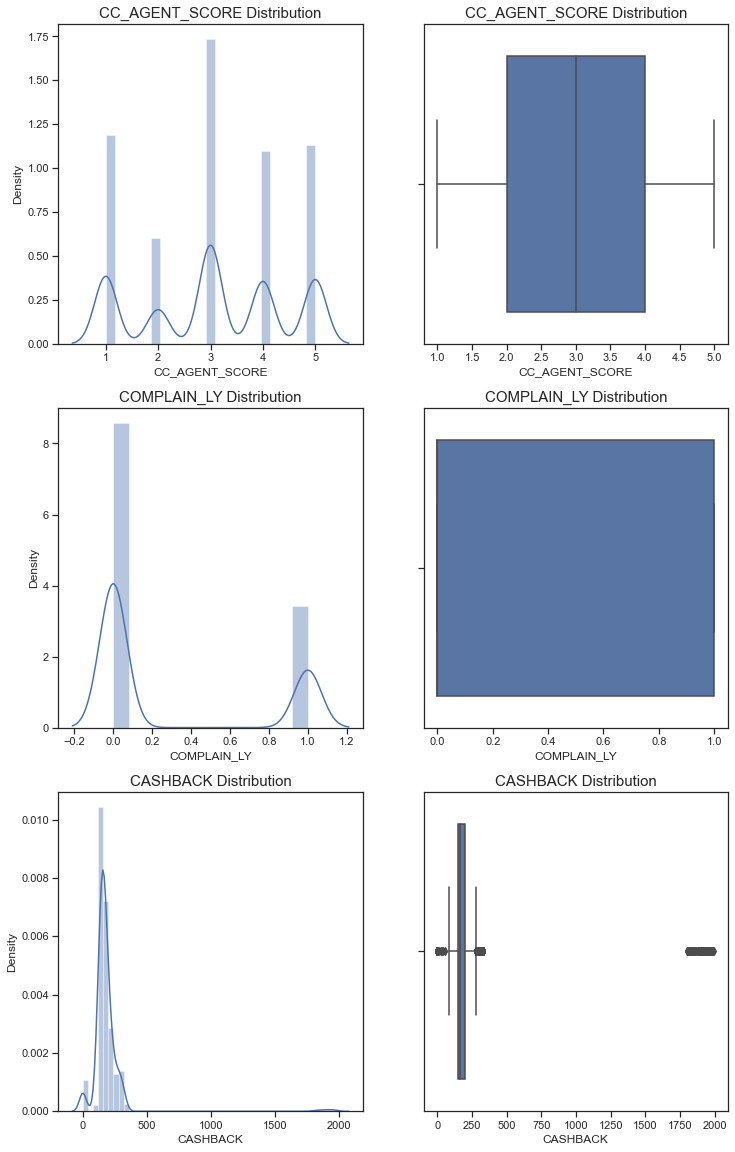

In [44]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12, 20)


a = sns.distplot(df['CC_AGENT_SCORE'] , ax=axes[0][0])
a.set_title("CC_AGENT_SCORE Distribution",fontsize=15)
a = sns.boxplot(df['CC_AGENT_SCORE'] , orient = "v" , ax=axes[0][1])
a.set_title("CC_AGENT_SCORE Distribution",fontsize=15)

a = sns.distplot(df['COMPLAIN_LY'] , ax=axes[1][0])
a.set_title("COMPLAIN_LY Distribution",fontsize=15)
a = sns.boxplot(df['COMPLAIN_LY'] , orient = "v" , ax=axes[1][1])
a.set_title("COMPLAIN_LY Distribution",fontsize=15)

a = sns.distplot(df['CASHBACK'] , ax=axes[2][0])
a.set_title("CASHBACK Distribution",fontsize=15)
a = sns.boxplot(df['CASHBACK'] , orient = "v" , ax=axes[2][1])
a.set_title("CASHBACK Distribution",fontsize=15)

#### Categorical variable analysis

Text(0.5, 1.0, 'LOGIN_DEVICE Distribution')

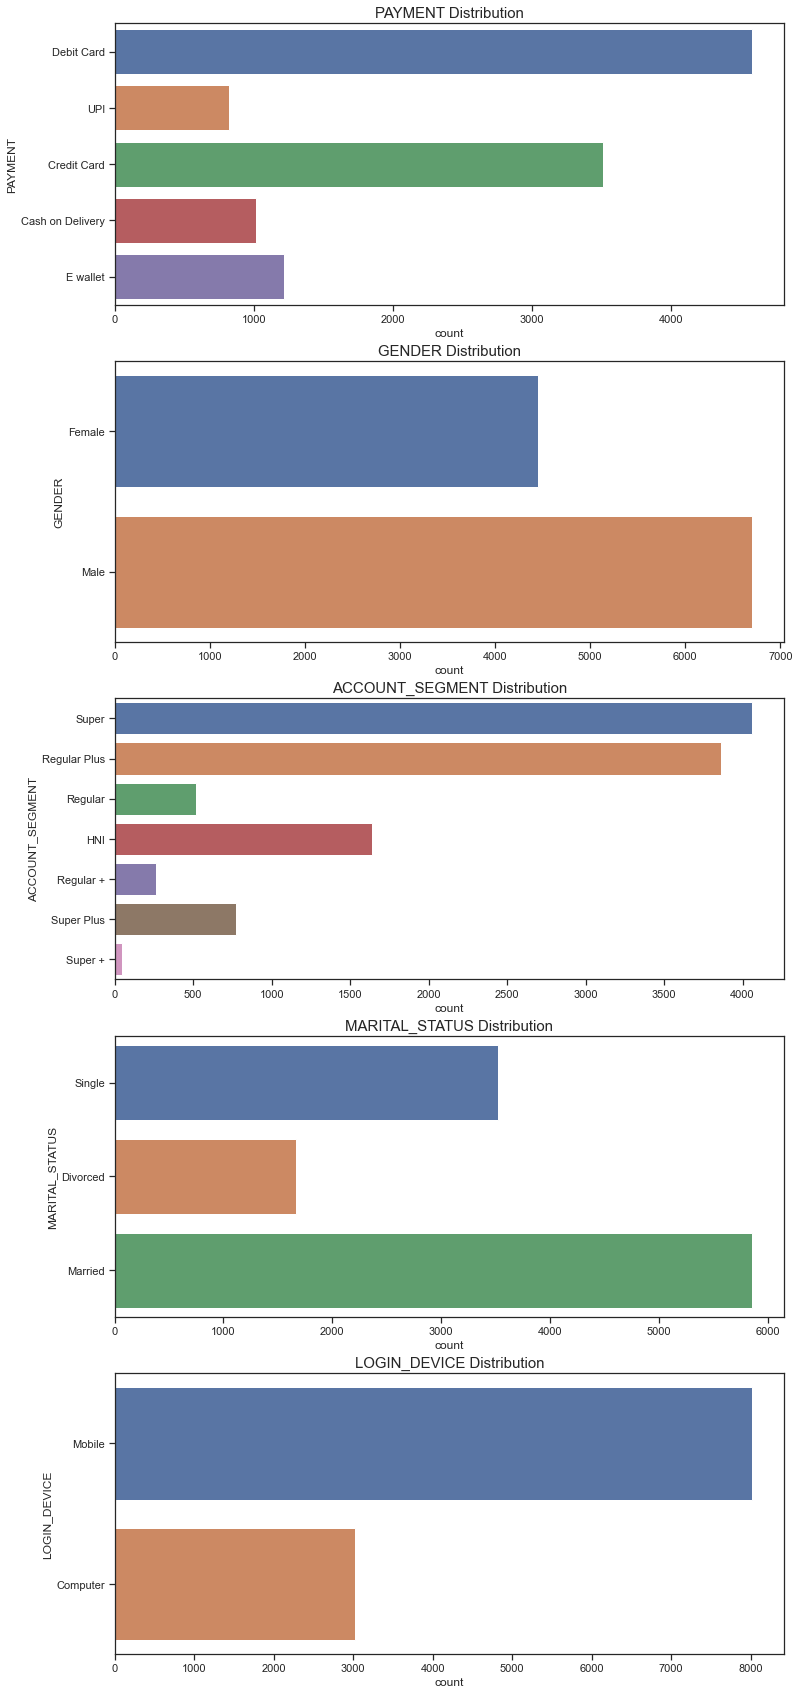

In [45]:
fig, axes = plt.subplots(nrows=5,ncols=1)
fig.set_size_inches(12, 30)

a = sns.countplot(y='PAYMENT', data=df, ax=axes[0])
a.set_title("PAYMENT Distribution",fontsize=15)

a = sns.countplot(y='GENDER', data=df, ax=axes[1])
a.set_title("GENDER Distribution",fontsize=15)

a = sns.countplot(y='ACCOUNT_SEGMENT', data=df, ax=axes[2])
a.set_title("ACCOUNT_SEGMENT Distribution",fontsize=15)

a = sns.countplot(y='MARITAL_STATUS', data=df, ax=axes[3])
a.set_title("MARITAL_STATUS Distribution",fontsize=15)

a = sns.countplot(y='LOGIN_DEVICE', data=df, ax=axes[4])
a.set_title("LOGIN_DEVICE Distribution",fontsize=15)

In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ACCOUNTID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.50,28444.25,31259.0
CHURN,11260.0,0.168384,0.374223,0.0,0.00,0.00,0.00,1.0
TENURE,11158.0,10.920864,12.852941,0.0,2.00,8.00,16.00,99.0
CITY_TIER,11148.0,1.653929,0.915015,1.0,1.00,1.00,3.00,3.0
CC_CONTACTED_LY,11158.0,17.867091,8.853269,4.0,11.00,16.00,23.00,132.0
SERVICE_SCORE,11162.0,2.902526,0.725584,0.0,2.00,3.00,3.00,5.0
ACCOUNT_USER_COUNT,11148.0,3.702009,1.008979,1.0,3.00,4.00,4.00,6.0
CC_AGENT_SCORE,11144.0,3.066493,1.379772,1.0,2.00,3.00,4.00,5.0
REV_PER_MONTH,11158.0,6.154956,11.564446,1.0,3.00,4.00,7.00,140.0
COMPLAIN_LY,10903.0,0.285334,0.451594,0.0,0.00,0.00,1.00,1.0


### Bi Variate Analysis

In [47]:
df.corr(method='pearson')

,ACCOUNTID,CHURN,TENURE,CITY_TIER,CC_CONTACTED_LY,SERVICE_SCORE,ACCOUNT_USER_COUNT,CC_AGENT_SCORE,REV_PER_MONTH,COMPLAIN_LY,REV_GROWTH_YOY,COUPON_USED_FOR_PAYMENT,DAY_SINCE_CC_CONNECT,CASHBACK
ACCOUNTID,1.000000,-0.009541,0.005659,0.001983,0.252562,0.301782,0.201430,-0.017715,0.071482,-0.005168,0.170600,0.105773,0.062811,0.025578
CHURN,-0.009541,1.000000,-0.231967,0.084135,0.072071,0.008991,0.105096,0.105796,0.022604,0.251488,-0.013806,-0.014777,-0.147935,-0.032276
TENURE,0.005659,-0.231967,1.000000,-0.030138,-0.003762,0.008532,-0.003016,-0.019053,0.028942,-0.022475,0.019517,0.089245,0.122491,0.080566
CITY_TIER,0.001983,0.084135,-0.030138,1.000000,0.011835,-0.006443,0.024735,-0.011479,-0.027072,0.002478,-0.030022,0.021119,0.023186,0.012221
CC_CONTACTED_LY,0.252562,0.072071,-0.003762,0.011835,1.000000,0.060052,0.020702,-0.000209,0.014728,0.027244,0.072702,0.005012,0.012969,0.002198
SERVICE_SCORE,0.301782,0.008991,0.008532,-0.006443,0.060052,1.000000,0.318153,0.032135,0.025892,0.002643,0.103478,0.181932,0.099812,0.042226
ACCOUNT_USER_COUNT,0.201430,0.105096,-0.003016,0.024735,0.020702,0.318153,1.000000,-0.017493,0.017297,0.003129,0.066476,0.143567,0.036547,0.037108
CC_AGENT_SCORE,-0.017715,0.105796,-0.019053,-0.011479,-0.000209,0.032135,-0.017493,1.000000,0.021191,-0.031459,-0.027149,0.030740,0.030779,-0.010352
REV_PER_MONTH,0.071482,0.022604,0.028942,-0.027072,0.014728,0.025892,0.017297,0.021191,1.000000,-0.002017,0.024370,0.016831,-0.001064,0.008260
COMPLAIN_LY,-0.005168,0.251488,-0.022475,0.002478,0.027244,0.002643,0.003129,-0.031459,-0.002017,1.000000,-0.005019,-0.006952,-0.041172,0.004072


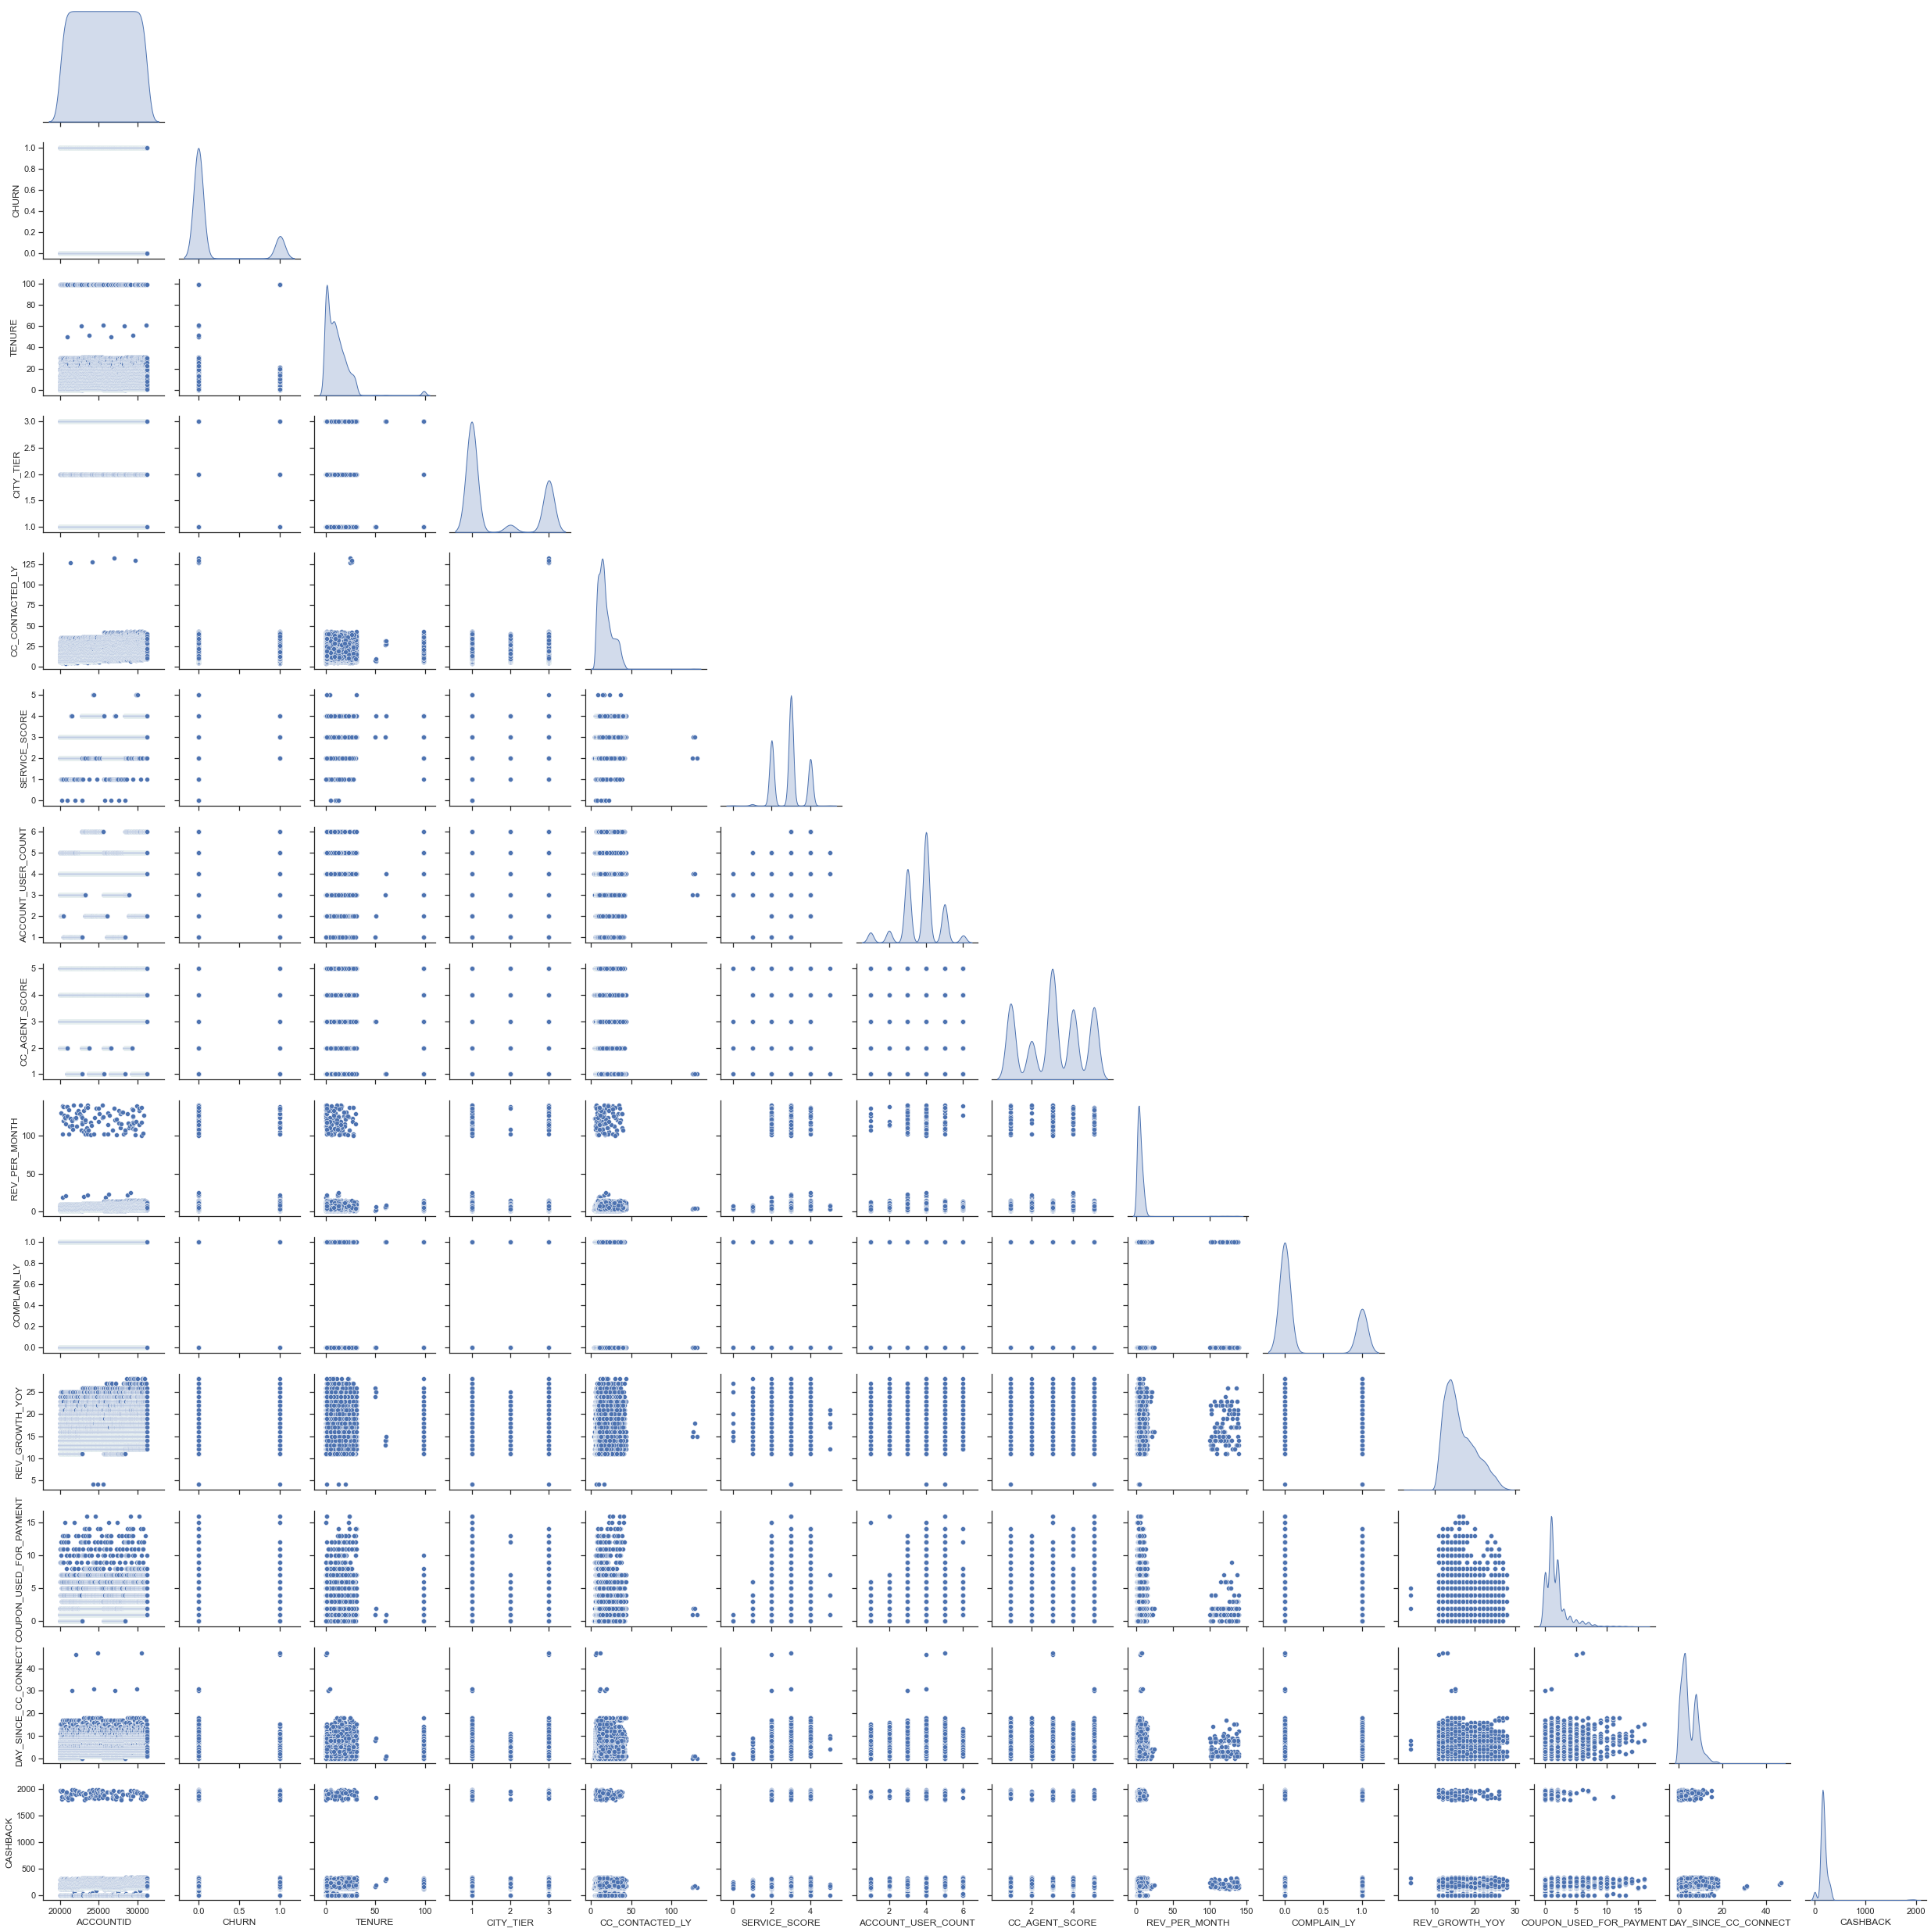

In [48]:
sns.pairplot(df,diag_kind='kde',corner=True)

In [49]:
noacntdf = df.drop('ACCOUNTID', axis=1)

<AxesSubplot:>

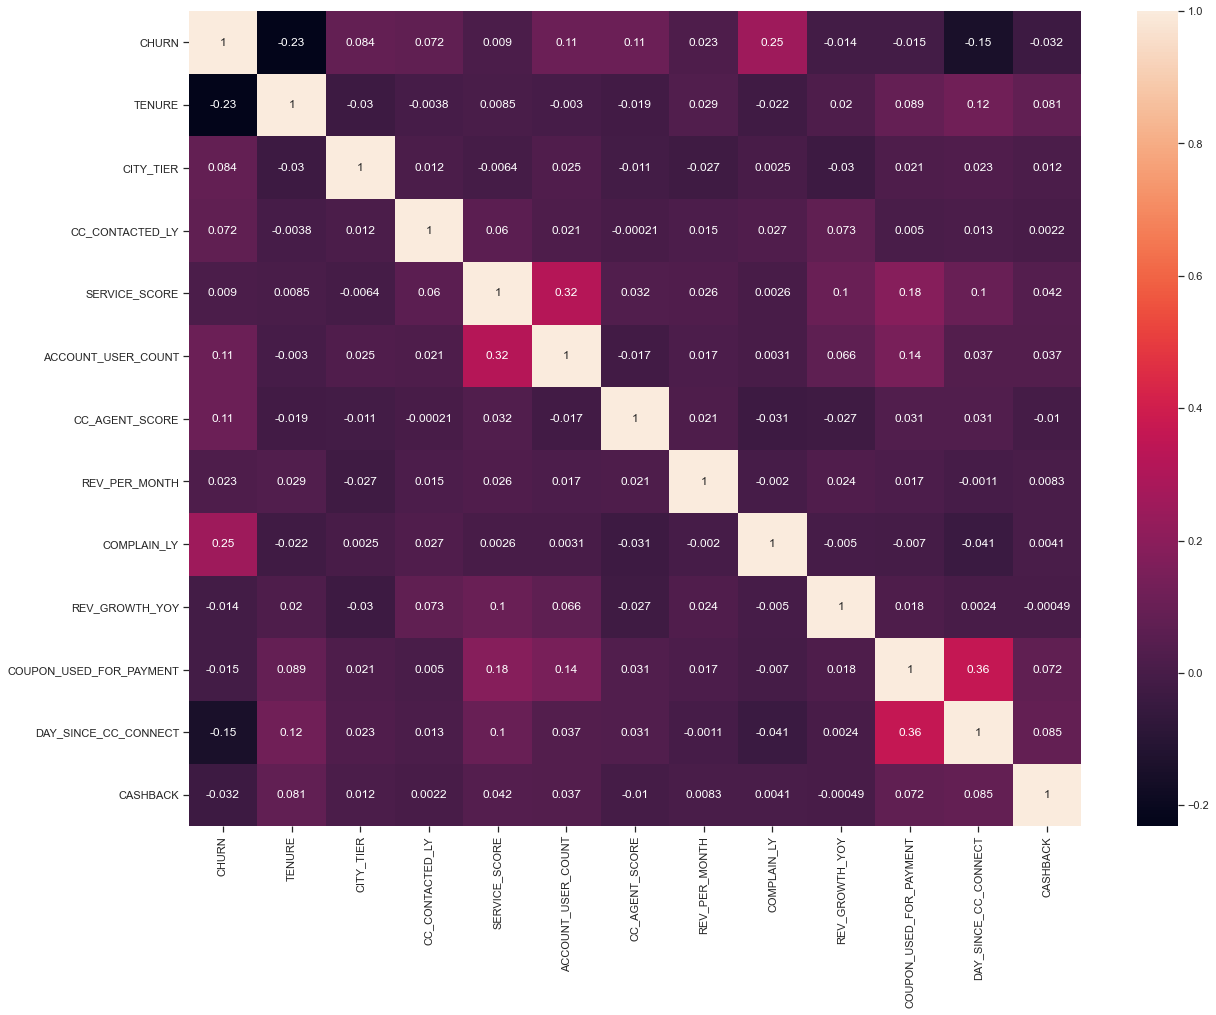

In [50]:
plt.subplots(figsize=(20,15))
sns.heatmap(noacntdf.corr(), annot=True)  # plot the correlation coefficients as a heatmap